# **Day 8: Embeddings**
---

### **Description**
In today's lab, we have another text classification task, but this time we will be using **embeddings.** For this project, we will be working with a dataset of BBC News articles classified by topic.

<br>

### **Lab Structure**

**Part 1**: [Review](#p1)
>
>**Part 1.1**: [Tokenization and Vectorization with sklearn](#p1.1)
>
>**Part 1.2**: [Tokenization and Vectorization with TextDataLoaders](#p1.2)

**Part 2**: [Embeddings](#p2)


**Part 3**: [News Classification with a Simple Neural Net with Embedding](#p3)

**Part 4**: [News Classification with a CNN with Embedding](#p4)

**Part 5**: [[ADDITIONAL PRACTICE] Sentiment Analysis with IMDB Movie Review](#p5)

<br>

### **Goals**
By the end of this lab, you will:
* Understand how tokenization and vectorization works when using TextDataLoaders
* Understand how to apply embedding layers in models.
* Compare a fully connected network to a CNN for text classification with embeddings.

<br>

### **Cheat Sheets**
[Natural Language Processing II](https://docs.google.com/document/d/1OoP-sFW6qMk0BzvYMlavgJtiXX9eziTUptlFdzgLfGk/edit)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from fastai.text.all import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0

<a name="p1"></a>

---
## **Part 1: Review**
---



<a name="p1.1"></a>

---
### **Part 1.1: Tokenization and Vectorization with sklearn**
---

**Run the cell below to load a simple corpus for us to work with.**

In [ ]:
# Define a collection of text documents
corpus = [
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)"
]

#### **Problem #1.1.1: Create a CountVectorizer object**



In [ ]:
vectorizer = #FILL IN CODE HERE

###### **Solution**

In [ ]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

#### **Problem #1.1.2: Fit the vectorizer to the corpus**



###### **Solution**

In [ ]:
# Fit the vectorizer to the corpus
vectorizer.fit(corpus)

CountVectorizer()

#### **Problem #1.1.3: Transform the corpus into a matrix of token counts**



In [ ]:
# Transform the corpus into a matrix of token counts
# WRITE YOUR CODE HERE

# Print the resulting matrix
print(X.toarray())

###### **Solution**

In [ ]:
# Transform the corpus into a matrix of token counts
X = vectorizer.transform(corpus)

# Print the resulting matrix
print(X.toarray())

[[1 1 0 0 0 0 0 1 3 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
  0 1 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 2 0 0 0 0 1]
 [1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  1 2 0 1 0 2 0]
 [1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
  0 1 1 0 0 0 0]]


#### **Problem #1.1.4: Print the tokens**

Use `get_feature_names_out()` to print the tokens.


###### **Solution**

In [ ]:
print(vectorizer.get_feature_names_out())

['about' 'all' 'are' 'beyond' 'body' 'bugs' 'can' 'cat' 'cent' 'cents'
 'do' 'for' 'good' 'hat' 'healthy' 'human' 'in' 'insects' 'inside'
 'learning' 'library' 'like' 'money' 'new' 'no' 'oh' 'old' 'on' 'one'
 'our' 'outside' 'place' 'solar' 'space' 'staying' 'system' 'that' 'the'
 'there' 'things' 'two' 'you' 'your']


Compare the tokens, the matrix, and the corpus. Do you see how each sentence is represented in the matrix?

<a name="p1.2"></a>

---
### **Part 1.2: Tokenization and Vectorization with TextDataLoaders**
---

Last time, we learned how to tokenize and vectorize data using `sklearn`'s `CountVectorizer()`. However, we don't always have to do this step manually. When loading data with fast.ai's `TextDataLoaders`, the DataLoader handles the tokenization and vectorization for us. Let's take a look.

**Run the code below to load the BBC News data into a pandas DataFrame.**


In [ ]:
dataset = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRRiQ1DUkUxk31YpaHA2i9QtwGq_VGXiy86z7l3aT9v5zoB6M7a-2M2qlYckr1C_ZG6StBELlU_hD3S/pub?output=csv')

#### **Problem #1.2.1: Load the data using TextDataLoaders**

Use the following parameters:
* `dataset`
* `text_col='text'`
* `label_col='category'`
* `valid_pct=0.2`
* `bs=64`
* `seq_len=100`


In [ ]:
dls = TextDataLoaders.from_df(
    #FILL IN CODE HERE
)

###### **Solution**

In [ ]:
dls = TextDataLoaders.from_df(
    dataset,
    text_col='text',
    label_col='category',
    valid_pct=0.2,
    bs=64,
    seed=42,
    seq_len=100
  )

#### **Problem #1.2.2: Print the vocabulary**


The `vocab` attribute of the DataLoaders object contains the vocabulary of the data and of the labels.

Use the first element of the `vocab` attribute of the DataLoaders object to print the vocabulary of the data.

###### **Solution**

In [ ]:
print(dls.vocab[0])

[['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxrep', 'xxwrep', 'xxup', 'xxmaj', 'mr', 'm', 'people', '3', 'new', '£', '0', 't', 'government', 'year', 'uk', 'film', 'best', 'world', 'music', 'labour', 'game', '1', '2', 'election', 'time', 'blair', 'party', 'mobile', 'market', 'like', 'england', 'games', 'years', 'company', 'tv', 'told', '6', 'sales', 'brown', 'technology', 'home', 'win', 'bbc', 'firm', 'says', 'million', 'economy', 'play', 'tax', '2004', 'number', 'public', 'net', 'british', 'digital', 'won', 'use', 'users', 'players', 'set', 'country', 'think', 'wales', 'minister', 'software', 'phone', 'bank', 'good', 'high', 'economic', '4', 'services', 'growth', 'said', 'group', 'club', 'report', 'european', 'howard', 'system', 'video', 'work', 'firms', 'france', '5', 'law', 'information', 'online', 'court', 'ireland', 'way', 'computer', 'radio', 'service', 'prime', 'united', 'going', 'data', 'china', 'day', 'security', 'o', '9', 'campaign', 'awards', 'second', 'want', 'right', 'm

#### **Problem #1.2.3: Print the labels**


Use the second element of the `vocab` attribute to print the labels.

###### **Solution**

In [ ]:
print(dls.vocab[1])

['business', 'entertainment', 'politics', 'sport', 'tech']


#### **Problem #1.2.4: View vectorized data**
---

TextDataLoaders assigns a unique integer ID to each token in the vocabulary, while preserving the order of the tokens.

Use `dls.one_batch()` to pull one batch of the data and view the first instance.

In [ ]:
xb, yb = # FILL IN CODE HERE

###### **Solution**

In [ ]:
# Get a batch of numericalized data
xb, yb = dls.one_batch()
print(xb[0])

TensorText([   2, 1042, 1125,  ..., 8250,  274, 5532])


#### **Problem #1.2.5: Decode vectorized data**
---

Use `dls.show()` to decode the numeric data.

*Hint: Pass a tuple to the function.*

###### **Solution**

In [ ]:
dls.show((xb[0], yb[0]))

xxbos terror powers expose tyranny lord defended government plans introduce control orders foreign british terrorist suspects house arrest isn t evidence trial lord falconer insists proposals xxunk police state strike balance protecting public threat terrorism xxunk civil liberties thriller writer frederick forsyth tells bbc personal xxunk danger aimed heart britain says home secretary charles clarke reaction cynical care care country 66 years alive hour day threat aimed point british coped xxunk coped fear state based fear coped threat turning country land state threat blair government seeks tyranny defend al qaeda tyranny born august 1938 xxunk threat xxunk little austrian called adolf hitler birthday threat reality war father wore uniform years 1945 xxunk peace 1946 winston churchill xxunk xxunk iron curtain descended iron curtain xxunk xxunk threat xxunk stalin triggered cold war berlin xxunk 1948 generation blighted threatened nuclear holocaust nuclear wind nuclear winter xxunk xx

---

<center>

#### **Back to lecture**

---

<a name="p2"></a>

---
## **Part 2: Embeddings**
---

#### **Problem #2.1: Create an embedding layer in PyTorch**


We can use PyTorch to create embeddings. Create an embedding layer. The first input will be the vocab size, and the second input is the embedding dimension. Set the embedding dimension to 50.

In [ ]:
# Create an embedding layer with 50 dimensions
vocab_size = # FILL IN CODE HERE
embedding = nn.Embedding(vocab_size, # FILL IN CODE HERE)

###### **Solution**

In [ ]:
# Create an embedding layer with 50 dimensions
vocab_size = len(dls.vocab[0])
embedding_dim = 50
embedding = nn.Embedding(vocab_size, embedding_dim)

#### **Problem #2.2: Apply the embedding**


Earlier, we pulled one batch of the data and saved the data `xb` and labels `yb`. Apply the embedding to the batch of data `xb`. Compare this numerical representation to the representation in Problem #4.

In [ ]:
# Apply the embedding layer
embedded = # FILL IN CODE HERE

# Print the first embedded instance of the data
embedded[0]

###### **Solution**

In [ ]:
# Apply the embedding layer
embedded = embedding(xb)

# Print the first embedded instance of the data
embedded[0]

TensorText([[-0.4599, -0.7374, -1.0278,  ...,  1.6564,  1.6007,  0.3935],
            [-1.3584,  0.0526, -1.4306,  ..., -0.7566, -0.1315,  0.4533],
            [-0.2772, -0.4570, -0.4024,  ..., -0.2897,  1.7811, -0.8780],
            ...,
            [ 0.5754,  0.0391, -1.1203,  ...,  1.5816,  0.9991,  0.0036],
            [ 0.0026, -0.1956,  0.6063,  ...,  0.4170,  0.9490, -0.0430],
            [-0.5181,  0.9071, -0.0532,  ..., -0.5875,  1.6289,  0.8499]],
           grad_fn=<AliasBackward0>)

#### **Run the code below to visualize the embedding.**

You can change the first and second dimension for plotting.

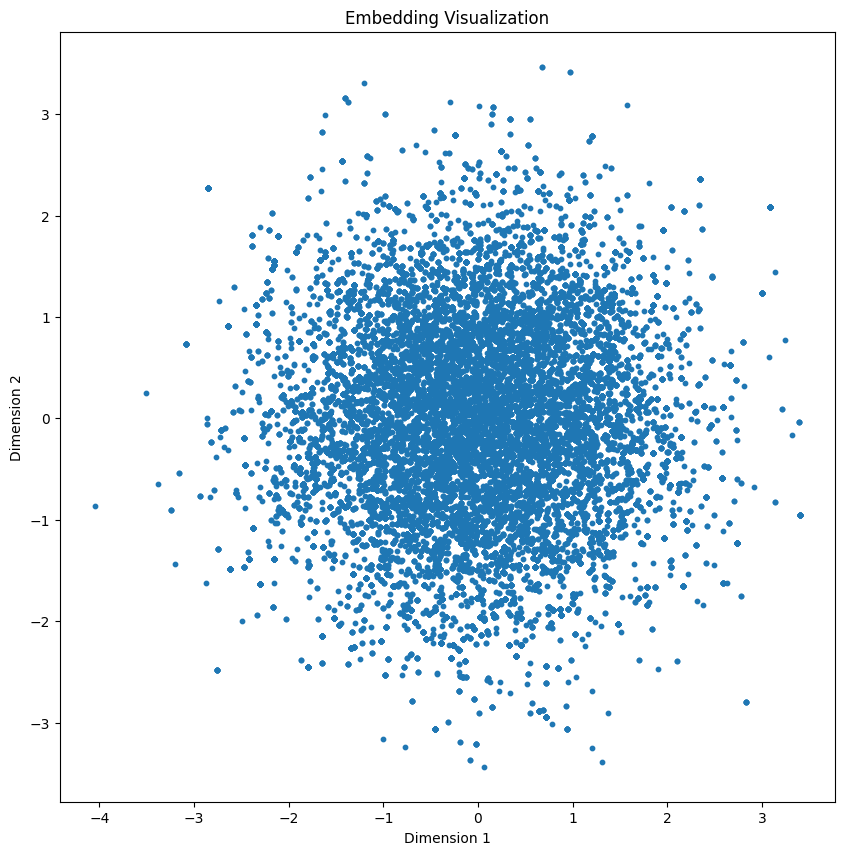

In [ ]:
first_dimension = 0
second_dimension = 1

# Detach the tensor from the computational graph (preparing for plotting)
embedded = embedded.detach()

# Plot the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(
    embedded[:, :, first_dimension].numpy().flatten(),
    embedded[:, :, second_dimension].numpy().flatten(),
    s=10)
plt.title('Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

---

<center>

#### **Back to lecture**

---

<a name="p3"></a>

---
## **Part 3: News Classification with a Simple Neural Net with Embedding**
---

#### **Problem #3.1**



Fill in the code below for a fully connected network of your own design. Ensure you have the correct number of inputs and outputs.

Set the embedding dimension to 200.

In [ ]:
embed_size = # FILL IN CODE HERE

model = nn.Sequential(
    nn.Embedding( # FILL IN CODE HERE
    nn.AdaptiveAvgPool2d((1, embed_size)),
    nn.Flatten(),
    nn.Linear(embed_size, # FILL IN CODE HERE
    # ADD THE REST OF YOUR LAYERS
)

###### **Solution**


In [ ]:
embed_size = 200

model = nn.Sequential(
    nn.Embedding(vocab_size, embed_size),
    nn.AdaptiveAvgPool2d((1, embed_size)),
    nn.Flatten(),
    nn.Linear(embed_size, 100),
    nn.ReLU(),
    nn.Linear(100, 5)
)

#### **Problem #3.2**

Create a Learner object and fit the model. Since this is a multiclass classification problem, you will use `nn.CrossEntropyLoss()` and accuracy as the metric. Choose your own hyperparameters (5 epochs and a learning rate of 0.001 is a good start.)

In [ ]:
# Create a Learner and train the model


###### **Solution**


In [ ]:
# Create a Learner and train the model
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=accuracy,
    opt_func=Adam)

learn.fit(5, 0.001)

learn.recorder.plot_loss()

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

#### **Problem #3.3**

Now, evaluate the model for both the training and validation sets.


In [ ]:
# Evaluate the training set


# Evaluate the test set


###### **Solution**


In [ ]:
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=dls.train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=dls.valid)
print(f"Validation accuracy: {valid_accuracy:.4f}")

Training accuracy: 0.8889


Validation accuracy: 0.6719


#### **How did your model perform? Try to improve your result with hyperparameter tuning.**




---

<center>

#### **Back to lecture**

---

<a name="p4"></a>

---
## **Part 4: News Classification with a CNN with Embedding**
---



#### **Problem #4.1**


Let's build a CNN model with an embedding layer. In order for the output of the embedding layer to be the right dimensions for the convolutional layer, we've provided a custom module that transposes the last two dimensions.

Remember, we've introduced a new version of the max pooling layer. The previous one specifies the pool size, and requires us to keep track of the output sizes:
* `nn.MaxPool1d(2)`

For the new one, we just specify what size *output* we would like:
* `nn.AdaptiveMaxPool1d(10)`

<br>

Define a CNN with the following layers:

Block 1:
* A convolutional layer with 300 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 10

Block 2
* A convolutional layer with 150 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 1

Finally, add:
* A Flatten layer
* A linear layer with 20 outputs and ReLU activation
* The output layer

In [ ]:
# To prepare the embedding layer for the convolutional layer, we need
# to define a custom module to transpose the last two dimensions.
class Transpose(nn.Module):
    def forward(self, x):
        return x.transpose(1, 2)

model = nn.Sequential(
    nn.Embedding(vocab_size, embed_size),
    Transpose(),
    nn.Conv1d(embed_size, # FILL IN CODE HERE
    # ADD THE REST OF THE LAYERS
)


###### **Solution**


In [ ]:
# To prepare the embedding layer for the convolutional layer, we need
# to define a custom module to transpose the last two dimensions.
class Transpose(nn.Module):
    def forward(self, x):
        return x.transpose(1, 2)

model = nn.Sequential(
    nn.Embedding(vocab_size, embed_size),
    Transpose(),
    nn.Conv1d(embed_size, 300, 11, padding='same'),
    nn.ReLU(),
    nn.AdaptiveMaxPool1d(10),
    nn.Conv1d(300, 150, 11, padding='same'),
    nn.ReLU(),
    nn.AdaptiveMaxPool1d(1),
    nn.Flatten(),
    nn.Linear(150, 20),
    nn.ReLU(),
    nn.Linear(20, 5)
)

#### **Problem #4.2**


Create a Learner object and fit the model. Since this is a multiclass classification problem, you will use `nn.CrossEntropyLoss()`

In [ ]:
# Create a Learner and train the model


###### **Solution**


epoch,train_loss,valid_loss,accuracy,time
0,1.655035,1.606048,0.235955,00:50
1,1.603828,1.576810,0.334831,00:50
2,1.509059,1.434602,0.341573,00:50
3,1.303810,1.537566,0.433708,00:50
4,1.074242,0.962593,0.595506,00:50
5,0.805405,0.962798,0.705618,00:50
6,0.602701,0.703953,0.750562,00:51
7,0.412592,0.773427,0.793258,00:51
8,0.263488,0.619196,0.815730,00:51
9,0.160169,0.559727,0.835955,00:51


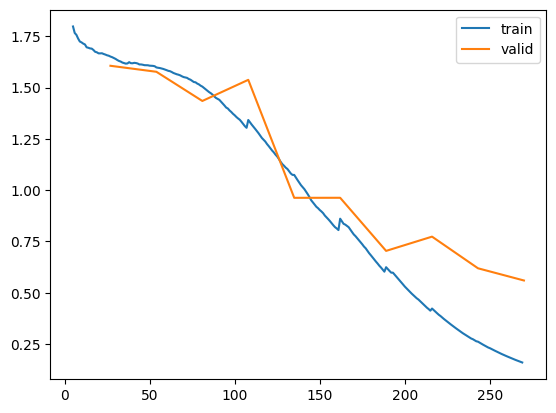

In [ ]:
# Create a Learner and train the model
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=accuracy,
    opt_func=Adam)

learn.fit(10, 0.001)

learn.recorder.plot_loss()

#### **Problem #4.3**


Now, evaluate the model for both the training and validation sets.


In [ ]:
# Evaluate the training set


# Evaluate the test set


###### **Solution**


In [ ]:
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=dls.train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=dls.valid)
print(f"Validation accuracy: {valid_accuracy:.4f}")

Training accuracy: 0.9994


Validation accuracy: 0.8360


#### **How did your model perform? Try to improve your result with hyperparameter tuning.**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/imdb_reviews/IMDB_Dataset.csv')
df = pd.DataFrame(dataset)

<a name="p5"></a>

---
## **[ADDITIONAL PRACTICE] Part 5: Sentiment Analysis with IMDB Movie Reviews**
---

In this part, we will create a CNN using the IMDB Movie Reviews dataset, which includes movie reviews along with their corresponding sentiment (positive, neutral, negative).

####**Problem #5.1**

**Run the code below to load the IMDB Movie Reviews data into a pandas DataFrame.**

View the DataFrame before beginning.


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/imdb_reviews/IMDB_Dataset.csv')

dataset.head()

#### **Problem #5.2: Load the data using TextDataLoaders**

Use the following parameters:
* `dataset`
* `text_col='review'`
* `label_col='sentiment'`
* `valid_pct=0.2`
* `bs=64`
* `seq_len=100`


In [ ]:
dls = TextDataLoaders.from_df(
    #FILL IN CODE HERE
)

###### **Solution**

In [ ]:
dls = TextDataLoaders.from_df(
    dataset,
    text_col='review',
    label_col='sentiment',
    valid_pct=0.2,
    bs=64,
    seed=42,
    seq_len=100
  )

#### **Problem #5.3: Print the vocabulary**


The `vocab` attribute of the DataLoaders object contains the vocabulary of the data and of the labels.

Use the first element of the `vocab` attribute of the DataLoaders object to print the vocabulary of the data.

###### **Solution**

In [ ]:
print(dls.vocab[0])

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxrep', 'xxwrep', 'xxup', 'xxmaj', 'the', '.', ',', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', '"', "'s", '-', 'was', '\n\n', 'as', 'movie', 'for', 'with', 'but', 'film', 'you', 'on', ')', "n't", '(', 'not', 'are', 'he', 'his', 'have', 'one', 'be', 'all', 'at', 'they', 'by', 'an', 'who', 'so', 'from', '!', 'like', 'there', 'or', 'just', 'do', 'her', 'out', 'about', "'", 'if', 'has', 'what', 'some', '?', 'good', 'when', 'more', 'very', 'she', 'would', 'up', 'no', 'time', '…', 'my', 'even', 'can', 'which', 'only', 'story', 'really', 'see', 'their', 'had', 'were', 'me', 'did', 'we', 'well', 'does', 'than', 'much', 'could', 'get', 'bad', 'been', ':', 'other', 'people', 'will', 'great', 'also', 'into', 'because', 'how', 'first', 'him', 'most', 'made', 'its', 'them', 'then', 'make', 'way', 'too', 'movies', 'any', 'after', 'characters', 'think', 'watch', 'character', '/', 'films', 'two', 'many', 'seen', 'being', ';', 'never', 

#### **Problem #5.4: Print the labels**


Use the second element of the `vocab` attribute to print the labels.

###### **Solution**

In [ ]:
print(dls.vocab[1])

['business', 'entertainment', 'politics', 'sport', 'tech']


#### **Problem #5.5: View vectorized data**


TextDataLoaders assigns a unique integer ID to each token in the vocabulary, while preserving the order of the tokens.

Use `dls.one_batch()` to pull one batch of the data and view the first instance.

In [ ]:
xb, yb = # FILL IN CODE HERE

###### **Solution**

In [ ]:
# Get a batch of numericalized data
xb, yb = dls.one_batch()
print(xb[0])

TensorText([    2,     8,  1051,  ...,    13,     7, 14849])


#### **Problem #5.6: Decode vectorized data**


Use `dls.show()` to decode the numeric data.

*Hint: Pass a tuple to the function.*

###### **Solution**

In [ ]:
dls.show((xb[0], yb[0]))

xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german suplex by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero xxunk up on him in the corner . xxmaj with xxmaj benoit stomping away on xxmaj bubba , xxmaj guerrero set up a table outside . xxmaj spike dashed into the ring and xxunk over the top rop

#### **Problem #5.7: Create an embedding layer in PyTorch**


We can use PyTorch to create embeddings. Create an embedding layer. The first input will be the vocab size, and the second input is the embedding dimension. Set the embedding dimension to 50.

In [ ]:
# Create an embedding layer with 50 dimensions
vocab_size = # FILL IN CODE HERE
embedding = nn.Embedding(vocab_size, # FILL IN CODE HERE)

###### **Solution**

In [ ]:
# Create an embedding layer with 50 dimensions
vocab_size = len(dls.vocab[0])
embedding_dim = 50
embedding = nn.Embedding(vocab_size, embedding_dim)

#### **Problem #5.8: Apply the embedding**


Earlier, we pulled one batch of the data and saved the data `xb` and labels `yb`. Apply the embedding to the batch of data `xb`. Compare this numerical representation to the representation in Problem #4.

In [ ]:
# Apply the embedding layer
embedded = # FILL IN CODE HERE

# Print the first embedded instance of the data
embedded[0]

###### **Solution**

In [ ]:
# Apply the embedding layer
embedded = embedding(xb)

# Print the first embedded instance of the data
embedded[0]

TensorText([[ 1.0850,  0.9410,  1.2099,  ...,  2.1001,  0.7174,  0.4020],
            [-1.6981,  1.3142, -0.6978,  ...,  0.1425, -0.5808, -0.8836],
            [ 1.7557,  2.3710, -0.2532,  ..., -0.8536, -0.3398, -0.2185],
            ...,
            [-1.3192,  0.7463,  0.4181,  ...,  0.2619, -0.3477, -1.1617],
            [ 0.4874,  0.6751,  1.8544,  ...,  0.4566, -0.3406, -0.5144],
            [-0.3312, -0.1420, -1.0148,  ..., -2.7914, -1.0447,  0.4925]],
           grad_fn=<AliasBackward0>)

#### **Run the code below to visualize the embedding.**

You can change the first and second dimension for plotting.

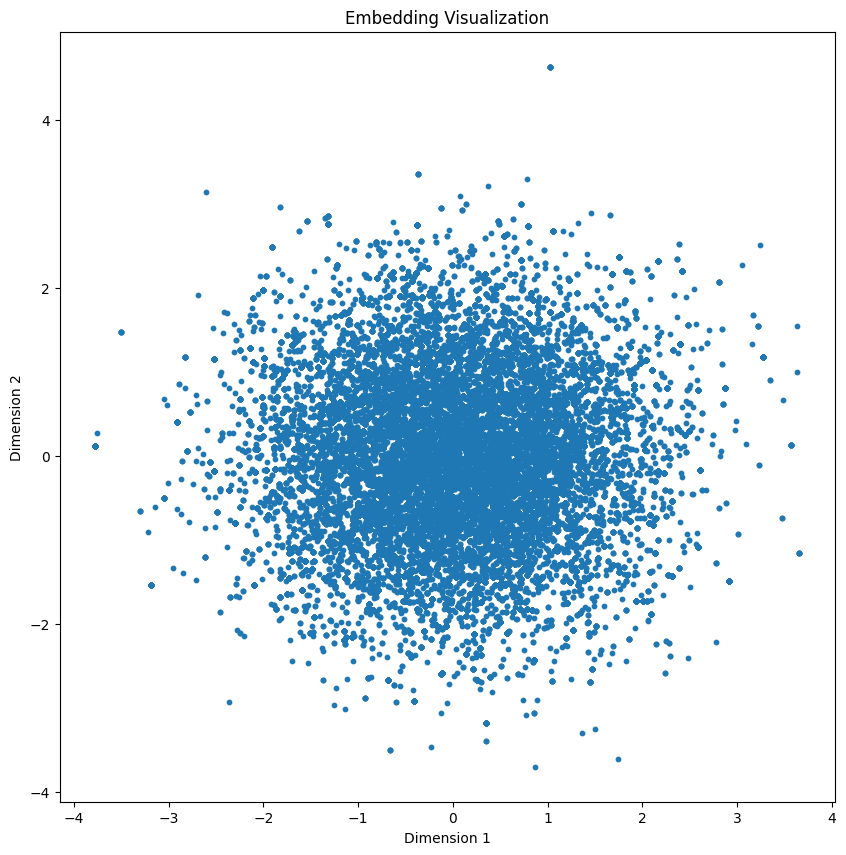

In [ ]:
first_dimension = 0
second_dimension = 1

# Detach the tensor from the computational graph (preparing for plotting)
embedded = embedded.detach()

# Plot the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(
    embedded[:, :, first_dimension].numpy().flatten(),
    embedded[:, :, second_dimension].numpy().flatten(),
    s=10)
plt.title('Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

#### **Problem #5.9**


Let's build a CNN model with an embedding layer. In order for the output of the embedding layer to be the right dimensions for the convolutional layer, we've provided a custom module that transposes the last two dimensions.

Remember, we've introduced a new version of the max pooling layer. The previous one specifies the pool size, and requires us to keep track of the output sizes:
* `nn.MaxPool1d(2)`

For the new one, we just specify what size *output* we would like:
* `nn.AdaptiveMaxPool1d(10)`

<br>

Define a CNN with the following layers:

Block 1:
* A convolutional layer with 300 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 10

Block 2
* A convolutional layer with 150 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 1

Finally, add:
* A Flatten layer
* A linear layer with 20 outputs and ReLU activation
* The output layer

In [ ]:
# To prepare the embedding layer for the convolutional layer, we need
# to define a custom module to transpose the last two dimensions.
class Transpose(nn.Module):
    def forward(self, x):
        return x.transpose(1, 2)

model = nn.Sequential(
    nn.Embedding(vocab_size, embed_size),
    Transpose(),
    nn.Conv1d(embed_size, # FILL IN CODE HERE
    # ADD THE REST OF THE LAYERS
)


###### **Solution**


In [ ]:
# To prepare the embedding layer for the convolutional layer, we need
# to define a custom module to transpose the last two dimensions.
class Transpose(nn.Module):
    def forward(self, x):
        return x.transpose(1, 2)

model = nn.Sequential(
    nn.Embedding(vocab_size, embed_size),
    Transpose(),
    nn.Conv1d(embed_size, 300, 11, padding='same'),
    nn.ReLU(),
    nn.AdaptiveMaxPool1d(10),
    nn.Conv1d(300, 150, 11, padding='same'),
    nn.ReLU(),
    nn.AdaptiveMaxPool1d(1),
    nn.Flatten(),
    nn.Linear(150, 20),
    nn.ReLU(),
    nn.Linear(20, 5)
)

#### **Problem #5.10**


Create a Learner object and fit the model. Since this is a multiclass classification problem, you will use `nn.CrossEntropyLoss()`

In [ ]:
# Create a Learner and train the model


###### **Solution**


In [ ]:
# Create a Learner and train the model
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=accuracy,
    opt_func=Adam)

learn.fit(10, 0.001)

learn.recorder.plot_loss()

#### **Problem #5.11**


Now, evaluate the model for both the training and validation sets.


In [ ]:
# Evaluate the training set


# Evaluate the test set


###### **Solution**


In [ ]:
# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=dls.train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=dls.valid)
print(f"Validation accuracy: {valid_accuracy:.4f}")

Training accuracy: 0.9994


Validation accuracy: 0.8360


---
#End of notebook
---
© 2024 The Coding School, All rights reserved